In [2]:
import pandas as pd
import numpy as np

In [3]:
!wget -O Fake_True.csv https://www.dropbox.com/scl/fi/wnq5q8ld4ehrkoc667zxw/Fake_True_new.csv?rlkey=qm9hbdltkwmkx62lboi5jotoo&st=2xtyw2hh&dl=0

--2024-08-23 10:33:40--  https://www.dropbox.com/scl/fi/wnq5q8ld4ehrkoc667zxw/Fake_True_new.csv?rlkey=qm9hbdltkwmkx62lboi5jotoo
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce466fab9c3f8010e502d722d36.dl.dropboxusercontent.com/cd/0/inline/CZJW1iedulvGcxpH4eGCyeq9XREGgpd8e42O2_PbD3D2ImWkbqAmx07MP59papaeRUaPJUU2nreBFbVBTcixlh7YQHejFyMR_WoaERiYO2zLub_H_lrYCEhaFI_hU7HZOr_6w67OyIaFaU3Zth0aak3x/file# [following]
--2024-08-23 10:33:40--  https://uce466fab9c3f8010e502d722d36.dl.dropboxusercontent.com/cd/0/inline/CZJW1iedulvGcxpH4eGCyeq9XREGgpd8e42O2_PbD3D2ImWkbqAmx07MP59papaeRUaPJUU2nreBFbVBTcixlh7YQHejFyMR_WoaERiYO2zLub_H_lrYCEhaFI_hU7HZOr_6w67OyIaFaU3Zth0aak3x/file
Resolving uce466fab9c3f8010e502d722d36.dl.dropboxusercontent.com (uce466fab9c3f8010e502d722d36.dl.dropboxusercontent.com)... 162.125.1.15, 2

In [4]:
df = pd.read_csv("Fake_True.csv")

Построем модель, используя TfidfVectorizer.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['text'],
                                                    df['reliability'],
                                                    test_size=0.25)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Построим consufion matrix

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5611
           1       0.99      0.99      0.99      5456

    accuracy                           0.99     11067
   macro avg       0.99      0.99      0.99     11067
weighted avg       0.99      0.99      0.99     11067



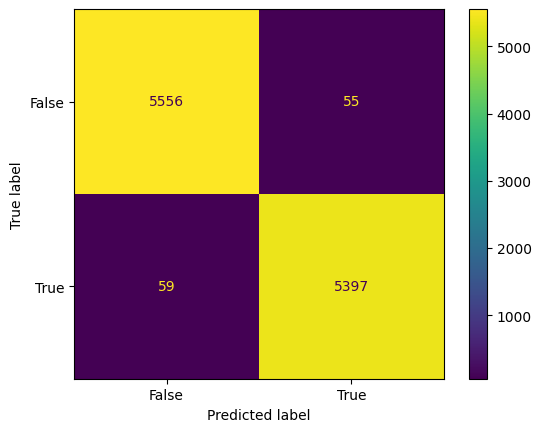

Accuracy Score of SVC: 98.9699105448631 %


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(x_test)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
print(report)
cm_display.plot()
plt.show()
print("Accuracy Score of SVC:", acc*100,"%")